In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
data = pd.read_csv("/content/drive/MyDrive/DataThon 2022/train.csv")
data2 = pd.read_csv("/content/drive/MyDrive/DataThon 2022/enflasyonlar2.csv")

In [7]:
data.isna().sum()

tarih                0
ürün                 0
ürün besin değeri    0
ürün kategorisi      0
ürün fiyatı          0
ürün üretim yeri     0
market               0
şehir                0
dtype: int64

In [8]:
# Enflasyon verisini düzenleme.

data2.columns = ["tarih","enflasyon"]
data2 = data2.apply(lambda x: x.str.replace(";", " "))
data2["enflasyon"] = data2["enflasyon"].astype(float)
print(type(data2["enflasyon"].values[0]))
data2["tarih"] = pd.to_datetime(data2["tarih"])
data2["tarih"] = data2["tarih"].dt.strftime("%m-%Y")
data2

<class 'numpy.float64'>


,tarih,enflasyon
0,01-2016,9.58
1,02-2016,8.78
2,03-2016,7.46
3,04-2016,6.57
4,05-2016,6.58
...,...,...
67,08-2021,19.25
68,09-2021,19.58
69,10-2021,19.89
70,11-2021,21.31


In [9]:
# Train Verisini İnceleme
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227520 entries, 0 to 227519
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tarih              227520 non-null  object 
 1   ürün               227520 non-null  object 
 2   ürün besin değeri  227520 non-null  int64  
 3   ürün kategorisi    227520 non-null  object 
 4   ürün fiyatı        227520 non-null  float64
 5   ürün üretim yeri   227520 non-null  object 
 6   market             227520 non-null  object 
 7   şehir              227520 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 13.9+ MB


In [10]:
columns = data.columns

for column_name in columns:
  print(column_name,"\n")
  print(data[column_name].unique())
  print(len(data[column_name].unique()))
  print("--------------------------------\n")

tarih 

['2016-01-01' '2016-02-01' '2016-03-01' '2016-04-01' '2016-05-01'
 '2016-06-01' '2016-07-01' '2016-08-01' '2016-09-01' '2016-10-01'
 '2016-11-01' '2016-12-01' '2017-01-01' '2017-02-01' '2017-03-01'
 '2017-04-01' '2017-05-01' '2017-06-01' '2017-07-01' '2017-08-01'
 '2017-09-01' '2017-10-01' '2017-11-01' '2017-12-01' '2018-01-01'
 '2018-02-01' '2018-03-01' '2018-04-01' '2018-05-01' '2018-06-01'
 '2018-07-01' '2018-08-01' '2018-09-01' '2018-10-01' '2018-11-01'
 '2018-12-01' '2019-01-01' '2019-02-01' '2019-03-01' '2019-04-01'
 '2019-05-01' '2019-06-01' '2019-07-01' '2019-08-01' '2019-09-01'
 '2019-10-01' '2019-11-01' '2019-12-01' '2020-01-01' '2020-02-01'
 '2020-03-01' '2020-04-01' '2020-05-01' '2020-06-01' '2020-07-01'
 '2020-08-01' '2020-09-01' '2020-10-01' '2020-11-01' '2020-12-01']
60
--------------------------------

ürün 

['kıyma' 'tavuk' 'hindi' 'Bakla-kuru' 'Bakla-taze' 'Bamya' 'Barbunya-kuru'
 'Bezelye-taze' 'Biber-yeşil' 'Brüksel laha.' 'Domates' 'Enginar'
 'Fasulye-kuru

In [11]:
data["ürün kategorisi"].unique()

array(['et', 'sebze ve bakliyat', 'tahıl ve ürünleri',
       'süt ürünleri ve kahvaltılık', 'meyve', 'kuruyemiş'], dtype=object)

et --> 8640
sebze ve bakliyat --> 83520
tahıl ve ürünleri --> 34560
süt ürünleri ve kahvaltılık --> 34560
meyve --> 51840
kuruyemiş --> 14400


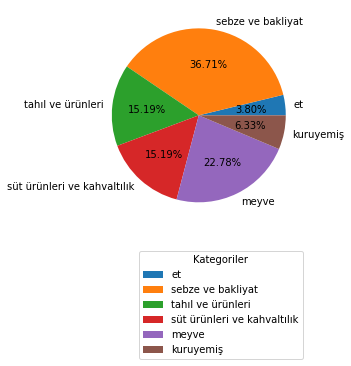

In [12]:
#Kategorilerin Oranı
shapes = []
for kategori in data["ürün kategorisi"].unique():
  temp_df = data.loc[data["ürün kategorisi"] == kategori]
  print(f"{kategori} --> {temp_df.shape[0]}")
  shapes.append(temp_df.shape[0])

plt.pie(shapes,labels = data["ürün kategorisi"].unique(),autopct='%1.2f%%')
plt.legend(title = "Kategoriler",bbox_to_anchor = (1, -0.1))
plt.show()

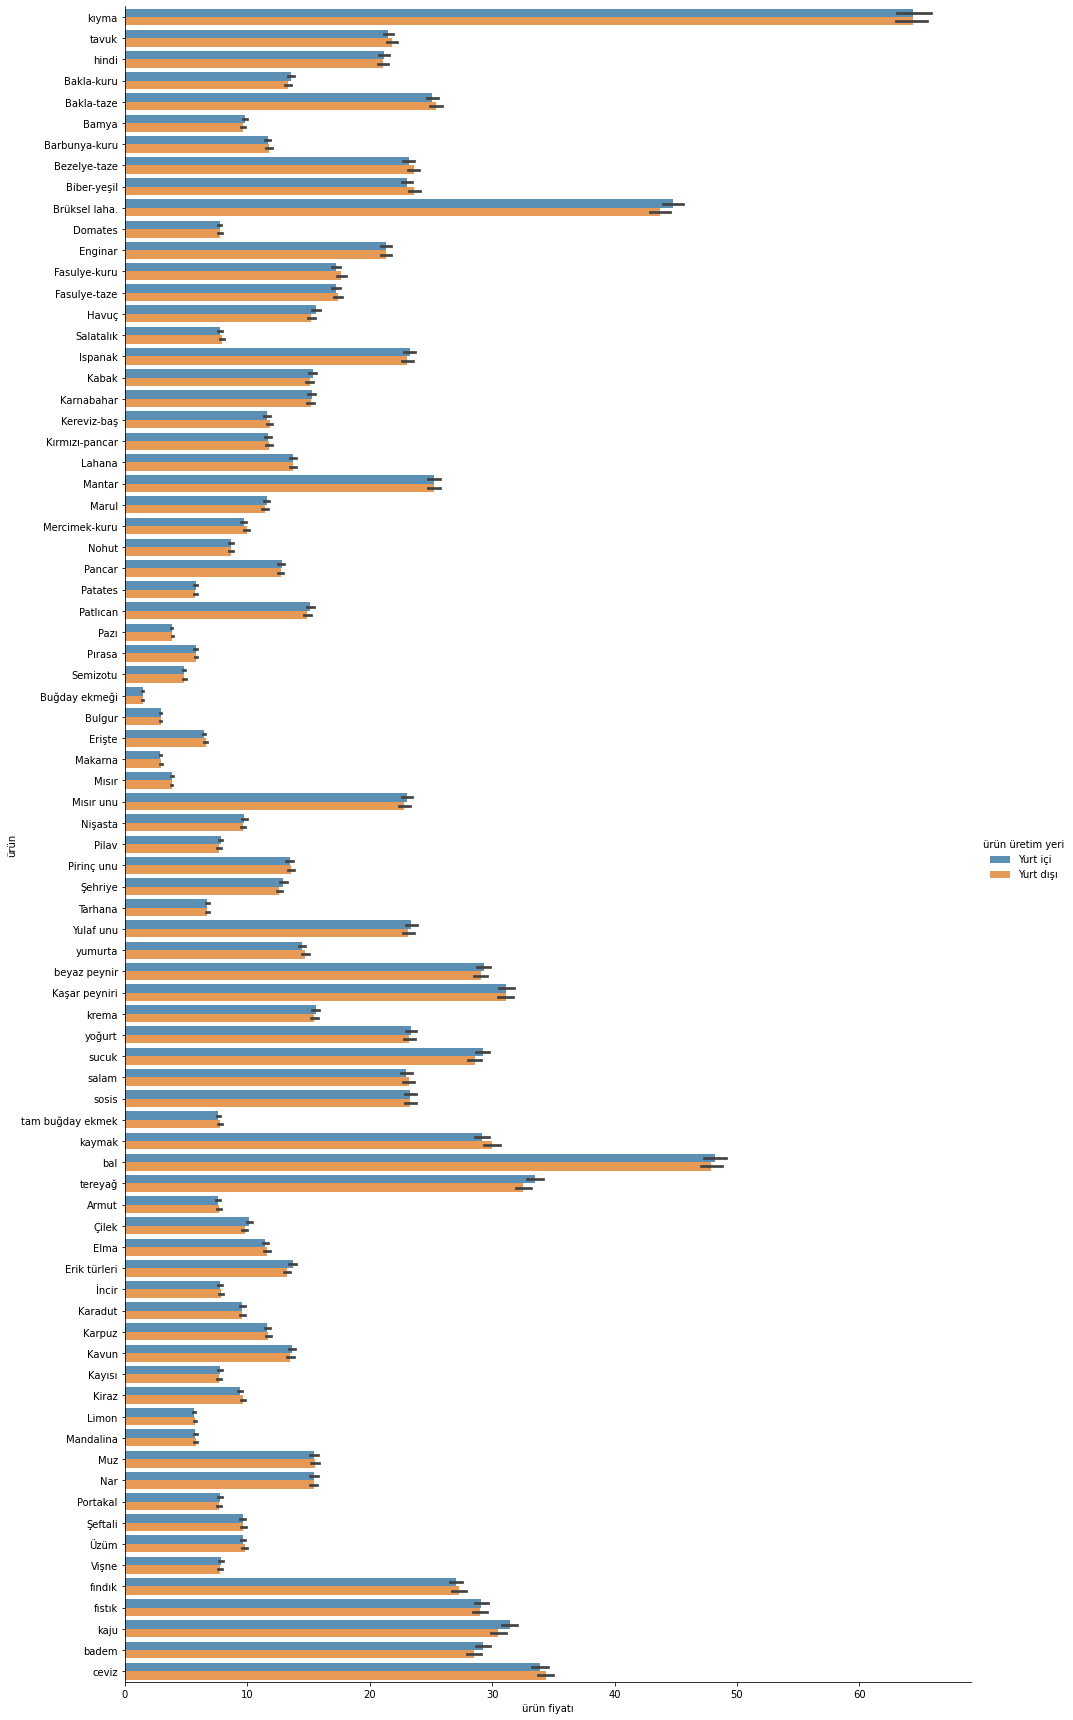

In [13]:
import seaborn as sns
sns.catplot(x="ürün fiyatı", y="ürün", hue="ürün üretim yeri", kind="bar",\
            data=data, height=24, alpha=.8, aspect=3/5.2)

In [14]:
df = pd.DataFrame()
for date in data["tarih"].unique():
  temp = pd.Timestamp(date)
  # print(temp)
  # print(temp.dayofweek)
  temp_df = data.loc[data["tarih"] == date]
  temp_df["gün"] = temp.dayofweek
  df = df.append(temp_df)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir,gün
0,2016-01-01,kıyma,120,et,33.41,Yurt içi,M,A,4
1,2016-01-01,tavuk,103,et,11.22,Yurt içi,M,A,4
2,2016-01-01,hindi,160,et,11.12,Yurt içi,M,A,4
3,2016-01-01,Bakla-kuru,354,sebze ve bakliyat,7.02,Yurt içi,M,A,4
4,2016-01-01,Bakla-taze,72,sebze ve bakliyat,13.14,Yurt içi,M,A,4
...,...,...,...,...,...,...,...,...,...
227515,2020-12-01,fındık,110,kuruyemiş,51.19,Yurt dışı,B,H,1
227516,2020-12-01,fıstık,115,kuruyemiş,55.14,Yurt dışı,B,H,1
227517,2020-12-01,kaju,100,kuruyemiş,58.60,Yurt dışı,B,H,1
227518,2020-12-01,badem,110,kuruyemiş,51.83,Yurt dışı,B,H,1


In [15]:
df["tarih"] = df["tarih"].astype('datetime64[ns]')
df["tarih"] = df["tarih"].dt.strftime("%m-%Y")
df

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir,gün
0,01-2016,kıyma,120,et,33.41,Yurt içi,M,A,4
1,01-2016,tavuk,103,et,11.22,Yurt içi,M,A,4
2,01-2016,hindi,160,et,11.12,Yurt içi,M,A,4
3,01-2016,Bakla-kuru,354,sebze ve bakliyat,7.02,Yurt içi,M,A,4
4,01-2016,Bakla-taze,72,sebze ve bakliyat,13.14,Yurt içi,M,A,4
...,...,...,...,...,...,...,...,...,...
227515,12-2020,fındık,110,kuruyemiş,51.19,Yurt dışı,B,H,1
227516,12-2020,fıstık,115,kuruyemiş,55.14,Yurt dışı,B,H,1
227517,12-2020,kaju,100,kuruyemiş,58.60,Yurt dışı,B,H,1
227518,12-2020,badem,110,kuruyemiş,51.83,Yurt dışı,B,H,1


In [16]:
data2

,tarih,enflasyon
0,01-2016,9.58
1,02-2016,8.78
2,03-2016,7.46
3,04-2016,6.57
4,05-2016,6.58
...,...,...
67,08-2021,19.25
68,09-2021,19.58
69,10-2021,19.89
70,11-2021,21.31


In [17]:
df2 = pd.DataFrame()
# df2["enflasyon"] = None
for date in df["tarih"].unique():
  temp_df = data2.loc[data2["tarih"] == date]
  temp_df2 = df.loc[df["tarih"] == date]
  enflasyon = temp_df["enflasyon"].values[0]
  temp_df2["enflasyon"] = enflasyon
  df2 = df2.append(temp_df2)
  # 
  # temp_df["enflasyon"] = enflasyon
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir,gün,enflasyon
0,01-2016,kıyma,120,et,33.41,Yurt içi,M,A,4,9.58
1,01-2016,tavuk,103,et,11.22,Yurt içi,M,A,4,9.58
2,01-2016,hindi,160,et,11.12,Yurt içi,M,A,4,9.58
3,01-2016,Bakla-kuru,354,sebze ve bakliyat,7.02,Yurt içi,M,A,4,9.58
4,01-2016,Bakla-taze,72,sebze ve bakliyat,13.14,Yurt içi,M,A,4,9.58
...,...,...,...,...,...,...,...,...,...,...
227515,12-2020,fındık,110,kuruyemiş,51.19,Yurt dışı,B,H,1,14.60
227516,12-2020,fıstık,115,kuruyemiş,55.14,Yurt dışı,B,H,1,14.60
227517,12-2020,kaju,100,kuruyemiş,58.60,Yurt dışı,B,H,1,14.60
227518,12-2020,badem,110,kuruyemiş,51.83,Yurt dışı,B,H,1,14.60


In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [19]:
df2["ürün"] = le.fit_transform(df2["ürün"])
df2["ürün kategorisi"] = le.fit_transform(df2["ürün kategorisi"])
df2["ürün üretim yeri"] = le.fit_transform(df2["ürün üretim yeri"])
df2["market"] = le.fit_transform(df2["market"])
df2["şehir"] = le.fit_transform(df2["şehir"])
df2["tarih"] = le.fit_transform(df2["tarih"])
df2

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir,gün,enflasyon
0,0,65,120,0,33.41,1,2,0,4,9.58
1,0,70,103,0,11.22,1,2,0,4,9.58
2,0,61,160,0,11.12,1,2,0,4,9.58
3,0,1,354,3,7.02,1,2,0,4,9.58
4,0,2,72,3,13.14,1,2,0,4,9.58
...,...,...,...,...,...,...,...,...,...,...
227515,59,59,110,1,51.19,0,0,7,1,14.60
227516,59,60,115,1,55.14,0,0,7,1,14.60
227517,59,62,100,1,58.60,0,0,7,1,14.60
227518,59,55,110,1,51.83,0,0,7,1,14.60


In [20]:
data3 = pd.read_csv("/content/drive/MyDrive/DataThon 2022/testFeatures.csv")
data3

,id,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün üretim yeri,market,şehir
0,0,2021-01-01,kıyma,120,et,Yurt içi,M,A
1,1,2021-01-01,tavuk,103,et,Yurt içi,M,A
2,2,2021-01-01,hindi,160,et,Yurt içi,M,A
3,3,2021-01-01,Bakla-kuru,354,sebze ve bakliyat,Yurt içi,M,A
4,4,2021-01-01,Bakla-taze,72,sebze ve bakliyat,Yurt içi,M,A
...,...,...,...,...,...,...,...,...
45499,45499,2021-12-01,fındık,110,kuruyemiş,Yurt dışı,B,H
45500,45500,2021-12-01,fıstık,115,kuruyemiş,Yurt dışı,B,H
45501,45501,2021-12-01,kaju,100,kuruyemiş,Yurt dışı,B,H
45502,45502,2021-12-01,badem,110,kuruyemiş,Yurt dışı,B,H


In [21]:
data3["tarih"] = data3["tarih"].astype('datetime64[ns]')
data3["tarih"] = data3["tarih"].dt.strftime("%m-%Y")
data3

,id,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün üretim yeri,market,şehir
0,0,01-2021,kıyma,120,et,Yurt içi,M,A
1,1,01-2021,tavuk,103,et,Yurt içi,M,A
2,2,01-2021,hindi,160,et,Yurt içi,M,A
3,3,01-2021,Bakla-kuru,354,sebze ve bakliyat,Yurt içi,M,A
4,4,01-2021,Bakla-taze,72,sebze ve bakliyat,Yurt içi,M,A
...,...,...,...,...,...,...,...,...
45499,45499,12-2021,fındık,110,kuruyemiş,Yurt dışı,B,H
45500,45500,12-2021,fıstık,115,kuruyemiş,Yurt dışı,B,H
45501,45501,12-2021,kaju,100,kuruyemiş,Yurt dışı,B,H
45502,45502,12-2021,badem,110,kuruyemiş,Yurt dışı,B,H


In [22]:
df3 = pd.DataFrame()
# df2["enflasyon"] = None
for date in data3["tarih"].unique():
  temp_df = data2.loc[data2["tarih"] == date]
  temp_df2 = data3.loc[data3["tarih"] == date]
  enflasyon = temp_df["enflasyon"].values[0]
  temp_df2["enflasyon"] = enflasyon
  df3 = df3.append(temp_df2)
df3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,id,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün üretim yeri,market,şehir,enflasyon
0,0,01-2021,kıyma,120,et,Yurt içi,M,A,14.97
1,1,01-2021,tavuk,103,et,Yurt içi,M,A,14.97
2,2,01-2021,hindi,160,et,Yurt içi,M,A,14.97
3,3,01-2021,Bakla-kuru,354,sebze ve bakliyat,Yurt içi,M,A,14.97
4,4,01-2021,Bakla-taze,72,sebze ve bakliyat,Yurt içi,M,A,14.97
...,...,...,...,...,...,...,...,...,...
45499,45499,12-2021,fındık,110,kuruyemiş,Yurt dışı,B,H,36.08
45500,45500,12-2021,fıstık,115,kuruyemiş,Yurt dışı,B,H,36.08
45501,45501,12-2021,kaju,100,kuruyemiş,Yurt dışı,B,H,36.08
45502,45502,12-2021,badem,110,kuruyemiş,Yurt dışı,B,H,36.08


In [23]:
test_df = df3.copy()
test_df["ürün"] = le.fit_transform(test_df["ürün"])
test_df["ürün kategorisi"] = le.fit_transform(test_df["ürün kategorisi"])
test_df["ürün üretim yeri"] = le.fit_transform(test_df["ürün üretim yeri"])
test_df["market"] = le.fit_transform(test_df["market"])
test_df["şehir"] = le.fit_transform(test_df["şehir"])
# test2_df["tarih"] = le.fit_transform(test_df["tarih"])


test_df_new = pd.DataFrame()

for date in test_df["tarih"].unique():
  temp = pd.Timestamp(date)
  temp_df = test_df.loc[test_df["tarih"] == date]
  temp_df["gün"] = temp.dayofweek
  test_df_new = test_df_new.append(temp_df)

test_df_new["tarih"] = test_df_new["tarih"].replace("01-2021",60)
test_df_new["tarih"] = test_df_new["tarih"].replace("02-2021",61)
test_df_new["tarih"] = test_df_new["tarih"].replace("03-2021",62)
test_df_new["tarih"] = test_df_new["tarih"].replace("04-2021",63)
test_df_new["tarih"] = test_df_new["tarih"].replace("05-2021",64)
test_df_new["tarih"] = test_df_new["tarih"].replace("06-2021",65)
test_df_new["tarih"] = test_df_new["tarih"].replace("07-2021",66)
test_df_new["tarih"] = test_df_new["tarih"].replace("08-2021",67)
test_df_new["tarih"] = test_df_new["tarih"].replace("09-2021",68)
test_df_new["tarih"] = test_df_new["tarih"].replace("10-2021",69)
test_df_new["tarih"] = test_df_new["tarih"].replace("11-2021",70)
test_df_new["tarih"] = test_df_new["tarih"].replace("12-2021",71)
test_df_new = test_df_new.set_index("id")
test_df_new


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün üretim yeri,market,şehir,enflasyon,gün
id,,,,,,,,,
0,60,65,120,0,1,2,0,14.97,4
1,60,70,103,0,1,2,0,14.97,4
2,60,61,160,0,1,2,0,14.97,4
3,60,1,354,3,1,2,0,14.97,4
4,60,2,72,3,1,2,0,14.97,4
...,...,...,...,...,...,...,...,...,...
45499,71,59,110,1,0,0,7,36.08,2
45500,71,60,115,1,0,0,7,36.08,2
45501,71,62,100,1,0,0,7,36.08,2


In [24]:
x = df2[["tarih","ürün","ürün besin değeri","ürün kategorisi","ürün üretim yeri","şehir","gün","market","enflasyon"]]
y = df2["ürün fiyatı"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) #random_state değiştirilebilir.

In [25]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(x_train)
# X_test = sc.fit_transform(x_test)

In [26]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

In [27]:
model_xgb = xgb.fit(x_train,y_train)
results = model_xgb.predict(test_df_new[["tarih","ürün","ürün besin değeri","ürün kategorisi","ürün üretim yeri","şehir","gün","market","enflasyon"]])
results

[19:56:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([82.25166 , 42.748985, 44.335644, ..., 44.42091 , 44.14386 ,
       49.537464], dtype=float32)

In [28]:
result_df = pd.DataFrame(columns = ["id","ürün fiyatı"])
result_df["id"] = test_df_new.index.values
result_df["ürün fiyatı"] = results
result_df = result_df.set_index("id")

result_df

,ürün fiyatı
id,
0,82.251663
1,42.748985
2,44.335644
3,25.988752
4,34.156036
...,...
45499,44.143860
45500,44.687359
45501,44.420910


In [29]:
y_train

108269     7.89
214301    55.29
32550     12.46
157084     1.68
65531      9.42
          ...  
89815      7.16
224719    41.43
16050      9.71
128803     3.22
40700      4.63
Name: ürün fiyatı, Length: 182016, dtype: float64

In [30]:
from math import sqrt
from sklearn.metrics import mean_squared_error
sqrt(mean_squared_error(y_test, results))

20.334524524807573